<a href="https://colab.research.google.com/github/ZhechengLiao/ML-algorithm/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build Logistic from Scratch

In [406]:
import numpy as np
from numpy.linalg import inv
from sklearn import datasets

In [407]:
iris = datasets.load_iris()
x_train = iris.data[:-50, :2]  # we only take the first two features.
y_train = iris.target[:-50]
x_test = iris.data[:50, :2]
y_test = iris.target[:50]

In [408]:
def sigmoid(w, x):
  z = w.dot(x.T)
  return 1.0 / (1.0 + np.exp(-z))

def loss(y, y_pred):
  return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

def gradient(x, y, y_pred):
  return 1/x.shape[0] * np.dot(x.T, (y_pred-y))

def hessian(x):
  return 1/x.shape[0] * np.sum(np.dot(sigmoid(w, x)*(1-sigmoid(w, x)), x.dot(x.T)))

def newton(x, y, y_pred):
  # f'(x) / f''(x) => grad / H
  return gradient(x, y, y_pred) / hessian(x)

In [410]:
w = np.zeros(2)
lr = 0.1
epoch_num = 100
loss(y_train, sigmoid(w, x_train))
w.shape

(2,)

In [389]:
for epoch in range(epoch_num):
  grad = gradient(x_train, y_train, sigmoid(w, x_train))
  w -= lr*grad
  l = loss(y_train, sigmoid(w, x_train))
  print(f'epoch: {epoch + 1}, loss: {l}, weight: {w}')

epoch: 1, loss: 0.685802727822415, weight: [ 0.02325 -0.01645]
epoch: 2, loss: 0.6793111071790089, weight: [ 0.03581836 -0.03867244]
epoch: 3, loss: 0.6729241157600723, weight: [ 0.04824053 -0.06074012]
epoch: 4, loss: 0.6666400122825773, weight: [ 0.06056313 -0.0826288 ]
epoch: 5, loss: 0.6604570812158791, weight: [ 0.07278727 -0.10433989]
epoch: 6, loss: 0.654373620031501, weight: [ 0.08491378 -0.12587496]
epoch: 7, loss: 0.6483879402125643, weight: [ 0.09694353 -0.14723559]
epoch: 8, loss: 0.6424983681919181, weight: [ 0.10887738 -0.16842337]
epoch: 9, loss: 0.6367032462219535, weight: [ 0.12071619 -0.18943992]
epoch: 10, loss: 0.6310009331777429, weight: [ 0.13246084 -0.21028683]
epoch: 11, loss: 0.6253898052952759, weight: [ 0.14411221 -0.23096575]
epoch: 12, loss: 0.6198682568466861, weight: [ 0.15567119 -0.25147828]
epoch: 13, loss: 0.6144347007544657, weight: [ 0.16713866 -0.27182607]
epoch: 14, loss: 0.6090875691467524, weight: [ 0.17851551 -0.29201075]
epoch: 15, loss: 0.6038

# Newton Method

In [390]:
for epoch in range(epoch_num):
  w -= newton(x_train, y_train, sigmoid(w, x_train))
  l = loss(y_train, sigmoid(w, x_train))
  print(f'epoch:{epoch}, loss: {l}, weight: {w}')

epoch:0, loss: 0.34950269048499427, weight: [ 0.90496983 -1.57639207]
epoch:1, loss: 0.34948153594249876, weight: [ 0.9050512  -1.57653549]
epoch:2, loss: 0.34946038358458614, weight: [ 0.90513257 -1.57667891]
epoch:3, loss: 0.3494392334109473, weight: [ 0.90521394 -1.57682233]
epoch:4, loss: 0.34941808542127356, weight: [ 0.90529531 -1.57696574]
epoch:5, loss: 0.3493969396152561, weight: [ 0.90537667 -1.57710914]
epoch:6, loss: 0.34937579599258606, weight: [ 0.90545803 -1.57725254]
epoch:7, loss: 0.3493546545529548, weight: [ 0.90553939 -1.57739594]
epoch:8, loss: 0.34933351529605366, weight: [ 0.90562074 -1.57753933]
epoch:9, loss: 0.3493123782215742, weight: [ 0.9057021  -1.57768272]
epoch:10, loss: 0.34929124332920763, weight: [ 0.90578345 -1.5778261 ]
epoch:11, loss: 0.3492701106186457, weight: [ 0.90586479 -1.57796948]
epoch:12, loss: 0.34924898008957966, weight: [ 0.90594614 -1.57811285]
epoch:13, loss: 0.34922785174170146, weight: [ 0.90602748 -1.57825622]
epoch:14, loss: 0.349

In [404]:
# Predict
y_preds = []
for y_pred in sigmoid(w, x_test):
  if y_pred > 0.5:
    y_pred = 1
  else:
    y_pred = 0
  y_preds.append(y_pred)

y_preds = np.array(y_preds)
y_preds, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]))

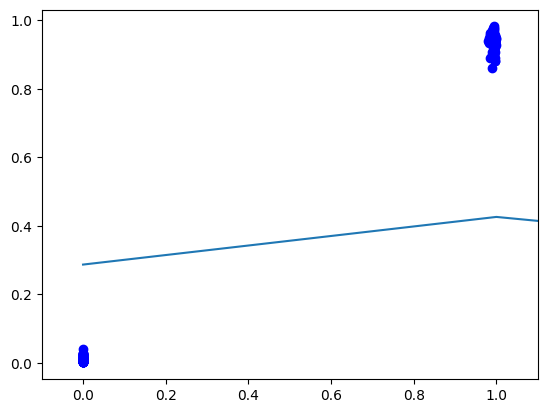

In [403]:
from matplotlib import pyplot as plt
for x1, x2 in x_train:
  plt.scatter(sigmoid(w, x1), sigmoid(w, x2), color='blue')
plt.plot(sigmoid(w, x_train))
plt.xlim([-0.1, 1.1])
plt.show()

# Pytorch logistic regression

In [394]:
from torch import nn
import torch
iris = datasets.load_iris()
x_train = torch.tensor(iris.data[:-50, :2], dtype=torch.float32)  # we only take the first two features.
y_train = torch.tensor(iris.target[:-50], dtype=torch.float32)

In [395]:
class LogisticRegression(torch.nn.Module):
  def __init__(self, inputDim, outputDim):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(inputDim, outputDim)

  def forward(self, x):
    output = torch.sigmoid(self.linear(x))
    return output

In [396]:
model = LogisticRegression(2, 1)
lr = 0.1
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
epoch_num = 100
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

<ipython-input-396-30ccdd14d0ef>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
<ipython-input-396-30ccdd14d0ef>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)


In [397]:
for epoch in range(epoch_num):
  optimizer.zero_grad()
  output = model(x_train)
  l = loss(torch.squeeze(output), y_train)
  l.backward()
  optimizer.step()
  print(f'epoch:{epoch+1}, loss:{l}, weigts:{[(w, b) for w, b in model.named_parameters()]}')

epoch:1, loss:0.9292832016944885, weigts:[('linear.weight', Parameter containing:
tensor([[ 0.5101, -0.6649]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-0.1054], requires_grad=True))]
epoch:2, loss:0.5409089922904968, weigts:[('linear.weight', Parameter containing:
tensor([[ 0.4497, -0.7215]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-0.1197], requires_grad=True))]
epoch:3, loss:0.5008278489112854, weigts:[('linear.weight', Parameter containing:
tensor([[ 0.4541, -0.7409]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-0.1221], requires_grad=True))]
epoch:4, loss:0.49700504541397095, weigts:[('linear.weight', Parameter containing:
tensor([[ 0.4634, -0.7574]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-0.1237], requires_grad=True))]
epoch:5, loss:0.4934260845184326, weigts:[('linear.weight', Parameter containing:
tensor([[ 0.4728, -0.7736]], requires_grad=True)), ('linear.bias', Parame